In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.1
m = 0.1
angle = (np.pi)/12
Sin = np.sin(angle)
Cos = np.cos(angle)
p_initial = np.array([0, 0])
p_final = np.array([10, 2])
T_max = 2
g = np.array([0, -9.8])

In [3]:
Up = 100
Low = 1
param = cp.Parameter(1)
Tension = cp.Variable((Up, 2))
position = cp.Variable((Up, 2))
Velocity = cp.Variable((Up, 2))
angle_matrix = np.array([[-Sin, Sin], [Cos, Cos]])
velocityConstraints = []
positionConstraints = []
Obj = cp.Minimize(0)
optimal = Up
constraints1 = [Tension >= 0, Tension <= 2, position[0]== p_initial, Velocity[0] == 0]
for i in range(Up-1):
    velocityConstraints.append(Velocity[i+1] == Velocity[i] + (h/m)*(angle_matrix@Tension[i]+m*g))
    positionConstraints.append(position[i+1] == position[i] + h*Velocity[i])
for i in range(30):
  param.value = np.atleast_1d((Up+Low)/2)
  if Up == Low:
    break
  k = int(param.value)
  constraintsFull = constraints1 + [position[k]==p_final] + [Velocity[k]==0] + velocityConstraints[:k] + positionConstraints[:k]
  prob = cp.Problem(Obj, constraintsFull)
  prob.solve()

  if prob.status == 'optimal':
    Up = k
    optimal = k
  else:
    Low = k+1
optimal = optimal + 1
print("Value of the Optimal is: ", optimal)

Value of the Optimal is:  34


Text(0, 0.5, 'Y coord')

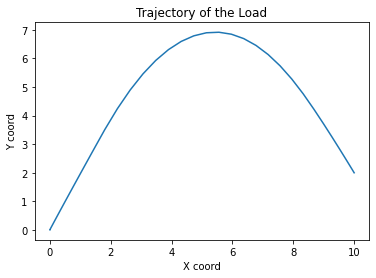

In [8]:
plt.plot(position[:optimal, 0].value, position[:optimal, 1].value)
plt.title("Trajectory of the Load")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Tension')

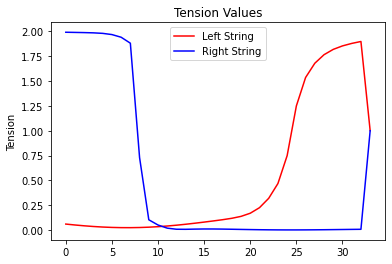

In [12]:
plt.plot(Tension[:optimal, 0].value, color = 'red', label = 'Left String')
plt.plot(Tension[:optimal, 1].value, color = 'blue', label = 'Right String')
plt.legend()
plt.title("Tension Values")
plt.ylabel("Tension")